In [1]:
from resample import permutation as perm
import numpy as np
import matplotlib.pyplot as plt

In [2]:
for p in sorted(dir(perm)):
    if p.startswith("_"):
        continue
    print(p)

PermutationResult
anova
cdf_gen
dataclass
kruskal
ks
mannwhitneyu
np
operator
pearson
rankdata
spearman
sys
test
tiecorrect
ttest


In [13]:
rng = np.random.default_rng(1)

d = {
    "x": rng.normal(0, 1, size=100),
    "y": rng.normal(1, 1, size=100),
    "z": rng.normal(0, 2, size=100)
}

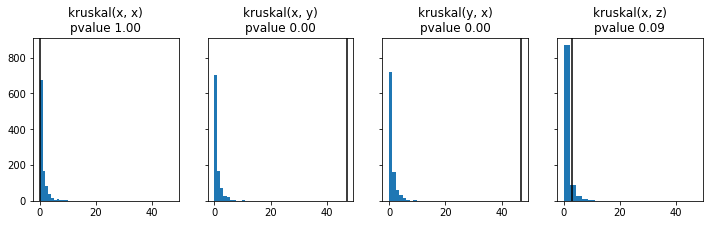

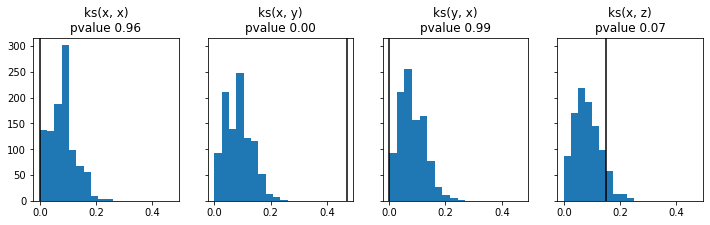

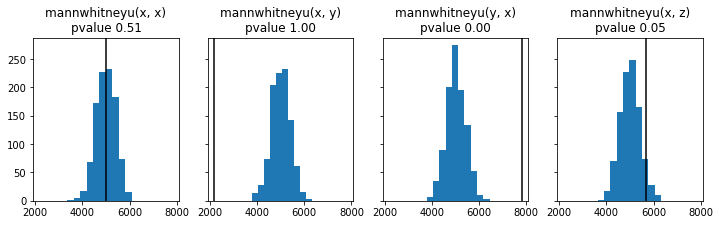

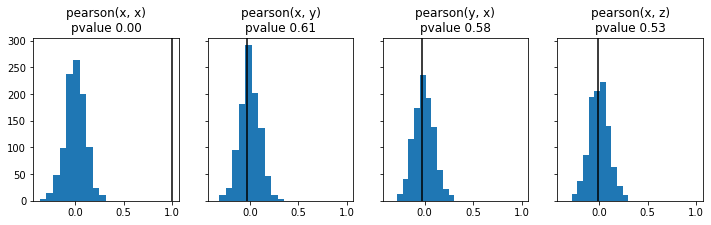

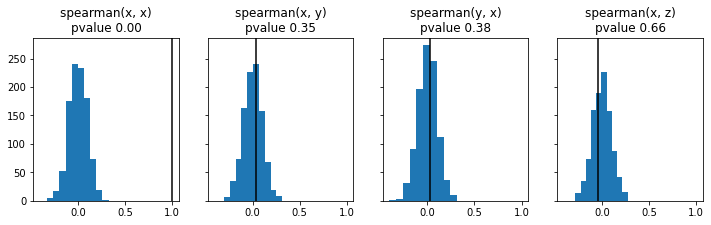

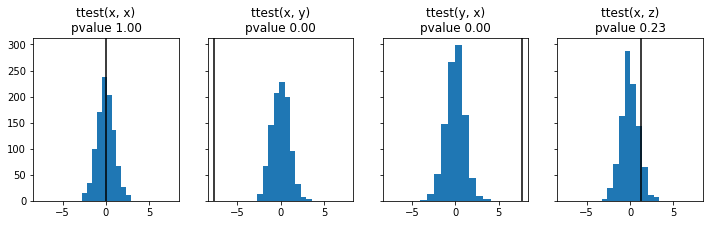

In [16]:
for test_name in ("kruskal",
             "ks",
             "mannwhitneyu",
             "pearson",
             "spearman",
             "ttest"):

    test = perm.__dict__[test_name]
    fig, ax = plt.subplots(1, 4, figsize=(12, 3),
                           sharex=True, sharey=True)

    for axi, (a, b) in zip(ax, "xx xy yx xz".split()):
        r = test(d[a], d[b])
        plt.sca(axi)
        plt.hist(r.samples)
        plt.axvline(r.statistic, color="k")
        plt.title(f"{test_name}({a}, {b})\npvalue {r.pvalue:.2f}")